In [1]:
# 네이버 뉴스 카테고리 코로나에서 1페이지의 뉴스기사 텍스트를 수집하고
# 명사에 대한 빈도수를 구하고 
# 워드클라우드로 시각화 하시오.

In [30]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import newspaper
import feedparser
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
from bs4 import BeautifulSoup
import urllib.request as MyURL
import requests

In [22]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%BD%94%EB%A1%9C%EB%82%98'
response = MyURL.urlopen(url)
html = BeautifulSoup(response, "html.parser")

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="코로나 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'코로나'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'코로나'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>코로나 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220113.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic
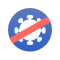
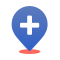
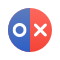
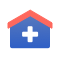

In [23]:
print(html)

## url 수집

In [25]:
articles = html.select("div.group_news > ul.list_news > li div.news_area > a")

In [26]:
print(articles)

[<a class="news_tit" href="http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00009&amp;news_seq_no=4681579" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=880000BF_000000000000000001635853&amp;g=057.0001635853&amp;u='+urlencode(this.href));" target="_blank" title="코로나19 어제 3,859명…대형마트 방역패스 해제"><mark>코로나</mark>19 어제 3,859명…대형마트 방역패스 해제</a>, <a class="news_tit" href="http://yna.kr/AKR20220117000800085?did=1195m" onclick="return goOtherCR(this, 'a=nws*j.tit&amp;r=3&amp;i=880000D8_000000000000000012921765&amp;g=001.0012921765&amp;u='+urlencode(this.href));" target="_blank" title="영국 코로나19 신규 한달여만에 최소…방역규제 완화 검토">영국 <mark>코로나</mark>19 신규 한달여만에 최소…방역규제 완화 검토</a>, <a class="news_tit" href="https://biz.chosun.com/topics/topics_social/2022/01/17/M2KOJAG46ZE4HP3R5CWLNISF4Y/?utm_source=naver&amp;utm_medium=original&amp;utm_campaign=biz" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=4&amp;i=88127058_000000000000000000787671&amp;g=366.0000787671&amp;u='+urlencode(this.href));

In [27]:
print(len(articles))

10


In [28]:
news_url = []
for i in articles:
    news_url.append(i.attrs['href'])
news_url

['http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00009&news_seq_no=4681579',
 'http://yna.kr/AKR20220117000800085?did=1195m',
 'https://biz.chosun.com/topics/topics_social/2022/01/17/M2KOJAG46ZE4HP3R5CWLNISF4Y/?utm_source=naver&utm_medium=original&utm_campaign=biz',
 'http://www.fnnews.com/news/202201171014533210',
 'https://view.asiae.co.kr/article/2022011710191303150',
 'https://news.kbs.co.kr/news/view.do?ncd=5374298&ref=A',
 'http://www.newsis.com/view/?id=NISX20220117_0001726970&cID=10809&pID=10800',
 'http://www.edaily.co.kr/news/newspath.asp?newsid=01702326632198704',
 'http://www.bloter.net/newsView/blt202201170040',
 'http://news.tvchosun.com/site/data/html_dir/2022/01/17/2022011790051.html']

## 기사본문수집

In [34]:
contents = []
for i in news_url:
    article = newspaper.Article(i, language='ko')
    article.download()
    article.parse()
    contents.append(article.text)

In [35]:
contents

['오늘부터 사적모임 6인 가능\n\n↑ 정부는 오는 17일부터 내달 6일까지 3주간 사적모임 인원을 6인으로, 식당·카페 등의 영업시간은 오후 9시로 제한하는 사회적 거리두기를 적용하기로 했다. 사진은 16일 오후 서울 마포구의 한 식당가 모습. / 사진 = 연합뉴스\n\n사적모임 4인→6인\n\n대형마트 방역패스 해제\n\n↑ 권덕철 중앙재난안전대책본부 1차장(보건복지부 장관)이 17일 오전 세종시 정부세종청사에서 열린 신종 코로나바이러스 감염증(코로나19) 대응 중앙재난안전대책본부 회의에 참석하고 있다. / 사진 = 연합뉴스\n\n\n\n\n\n최근 코로나19 신규 확진자 수가 3,000명에서 4,000명대 중반을 오가는 가운데 오늘(17일) 0시 기준 신규 확진자 수는 4,000명에 달했습니다. 이날부터는 사적모임 인원 제한 수가 기존 4인에서 6인으로 늘어나며, 대형마트와 영화관 등의 시설에 대해 방역패스가 해제될 예정입니다.질병관리본부 중앙방역대책본부는 오늘(17일) 0시 기준 신규 확진자 수가 3,859명 발생했다고 밝혔습니다. 국내 발생이 3,551명, 해외 유입이 308명입니다. 이로써 코로나19 누적 환진자 수는 696,032명으로 집계됐습니다.지난 11일부터 이날까지 최근 일주일 간 신규 확진자 수는 3,094명→4,383명→4,165명→4,538명→4,421명→4,194명→3,859명으로 하루 평균 약 4,094명 발생했습니다.사망자는 23명 늘어 총 6,333명, 위중증 환자는 33명 줄어 579명으로 나타났습니다.이날부터 사적 모임 인원 제한이 기존 4인에서 6인으로 늘어납니다. 이외에 식당과 카페 영업 제한 시간 9시 등 기존 사회적 거리두기 방침은 그대로 유지됩니다.이 같은 거리두기 조치는 이날부터 설 연휴 이후인 내달 6일까지 3주 동안 적용될 예정입니다.방역당국은 곧 다가올 설 연휴와 국민들이 느끼는 방역 피로도를 고려해 사적 모임 제한 인원을 2명 늘린 조치를 취했다고 설명했습니다.정부는 코로나19 감염 전파 위험이 적은 보습

## 명사에 대한 빈도수 구하기

In [40]:
from nltk import Text
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [39]:
News = ' '.join(contents)

In [38]:
okt = Okt()

In [45]:
NewsN = okt.nouns(News)

In [46]:
txtNewsN = Text(NewsN)

In [47]:
txtNewsN.vocab()

FreqDist({'명': 80, '코로나': 34, '방역': 22, '것': 21, '등': 19, '환자': 17, '치료': 16, '진자': 15, '확': 14, '날': 14, ...})

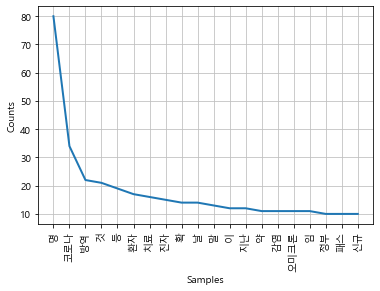

In [49]:
txtNewsN.plot(20)

## 워드클라우드 그리기

In [50]:
from wordcloud import WordCloud

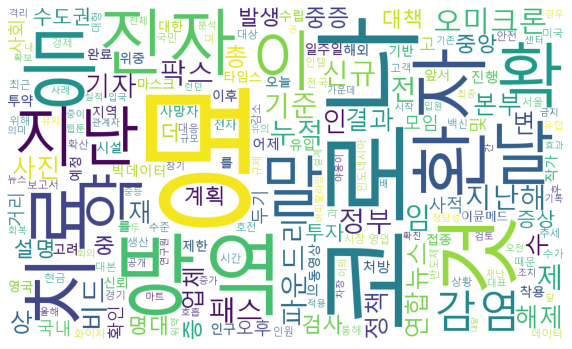

In [51]:
font_path = 'c:\Windows\Fonts\malgun.ttf'
wc = WordCloud(width = 1000, height = 600, background_color='white', font_path = 'c:\Windows\Fonts\malgun.ttf' )
gen = wc.generate_from_frequencies(txtNewsN.vocab())
plt.figure(figsize = (10, 8))
plt.imshow(gen)
plt.axis('off')
plt.show()